
# Four-agent MPPI navigation
Runs four MPPI agents toward the same goal, treating peers as static obstacles, and saves a GIF of the rollout.


In [1]:

import os, sys
sys.path.append(os.path.abspath('src'))
sys.path.append(os.path.abspath('app'))


simulating:   0%|          | 0/20100 [00:00<?, ?it/s]

Device: cpu
Device: cpu
Device: cpu
Device: cpu
Saved GIF to video/multi_agent.gif
Trajectory lengths [201, 201, 201, 201]


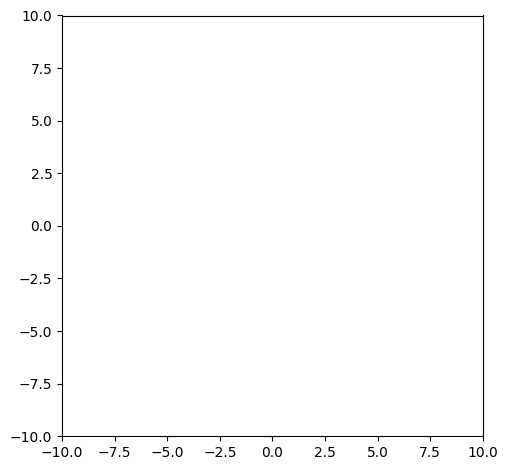

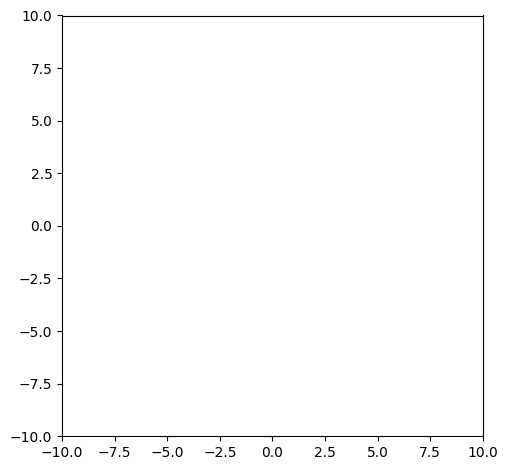

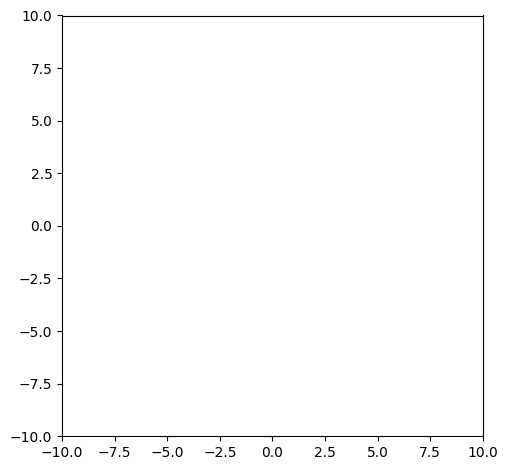

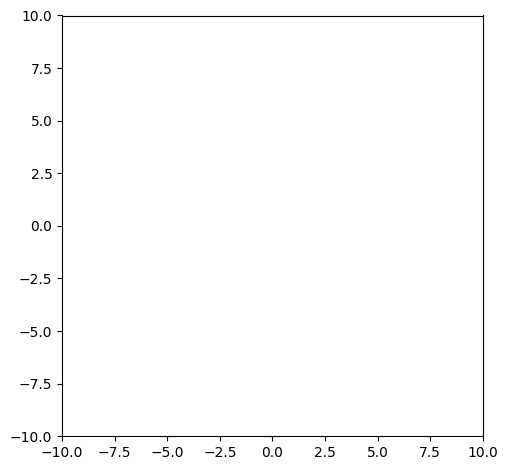

In [2]:

from tqdm.notebook import tqdm
from mppi_MAS_Naive.two_agent_navigation import run_multi_agent_navigation

gif_path = 'video/multi_agent.gif'
progress = tqdm(total=20100, desc='simulating')
trajectories = run_multi_agent_navigation(max_steps=200, num_agents=4, save_gif_path=gif_path, progress_fn=progress.update)
progress.close()
print(f'Saved GIF to {gif_path}')
print('Trajectory lengths', [len(t) for t in trajectories])


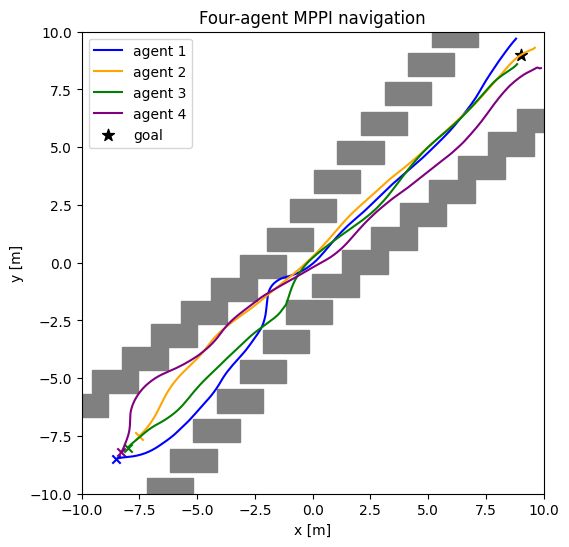

In [3]:

import matplotlib.pyplot as plt
from mppi_MAS_Naive.two_agent_navigation import _make_envs

# recreate envs with the same defaults to render the shared map
envs = _make_envs(num_agents=4, peer_safe_distance=0.8)
shared_map = envs[0]._obstacle_map
goal = envs[0]._goal_pos.cpu().numpy()

colors = ['blue', 'orange', 'green', 'purple']
fig, ax = plt.subplots(figsize=(6, 6))
shared_map.render(ax, zorder=0)
for idx, traj in enumerate(trajectories):
    color = colors[idx % len(colors)]
    ax.plot(traj[:, 0], traj[:, 1], label=f'agent {idx+1}', color=color)
    ax.scatter(envs[idx]._start_pos[0], envs[idx]._start_pos[1], c=color, marker='x')
ax.scatter(goal[0], goal[1], c='black', marker='*', s=80, label='goal')
ax.set_aspect('equal')
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_title('Four-agent MPPI navigation')
ax.legend()
plt.show()


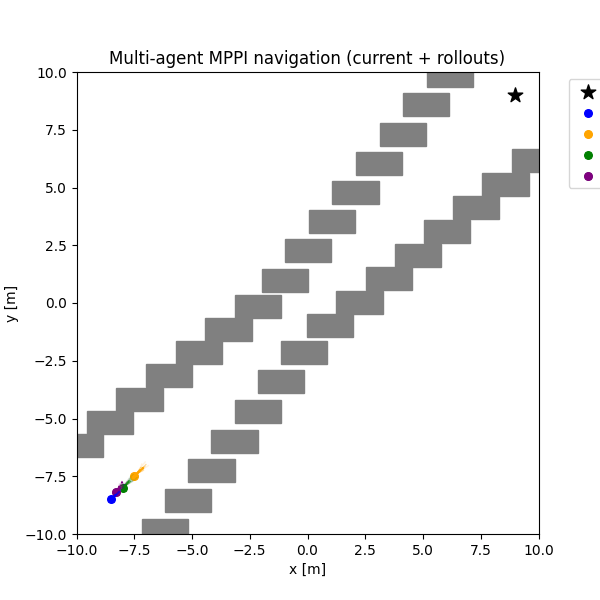

In [4]:

from IPython.display import Image

Image(filename=gif_path)


In [5]:

from IPython.display import FileLink

FileLink(gif_path)


c:\Users\user\OneDrive\학기수업\25-2\스토캐스틱\mppi_cem_tutorial\video\multi_agent.gif